# E-handel: Snabbrapport

Average Order Value: 1401.11
Median: 1088.69
Spread: 9142.60
IQ3-IQ1: 1884.75-577.96 = 1306.79 


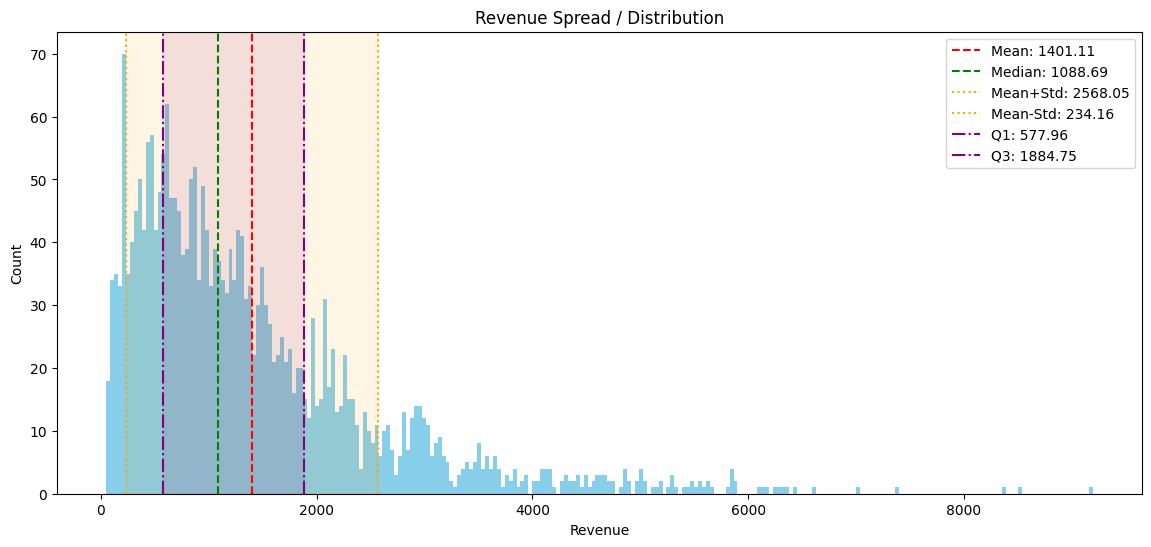

In [1]:
import sys, os
sys.path.append(os.path.abspath("../src/"))
import io_utils as util
import metrics as met
import viz as vz
import pandas as pd

orders = util.extract_orders_from_csv()
df = pd.DataFrame(orders, columns=list(util.column.keys()))

mean, median, std, q1, q3, iqr, spread = met.revMetrics(df, "revenue")

print(f"Average Order Value: {mean:.2f}") 
print(f"Median: {median:.2f}")
print(f"Spread: {spread:.2f}")
print(f"IQ3-IQ1: {q3:.2f}-{q1:.2f} = {q3 - q1} ")

vz.plotMetrics(df["revenue"], mean, median, std, q1, q3)

Stockholm    1.232625
Göteborg     1.410541
Malmö        1.553222
Uppsala      2.223560
Västerås     1.848316
dtype: float64


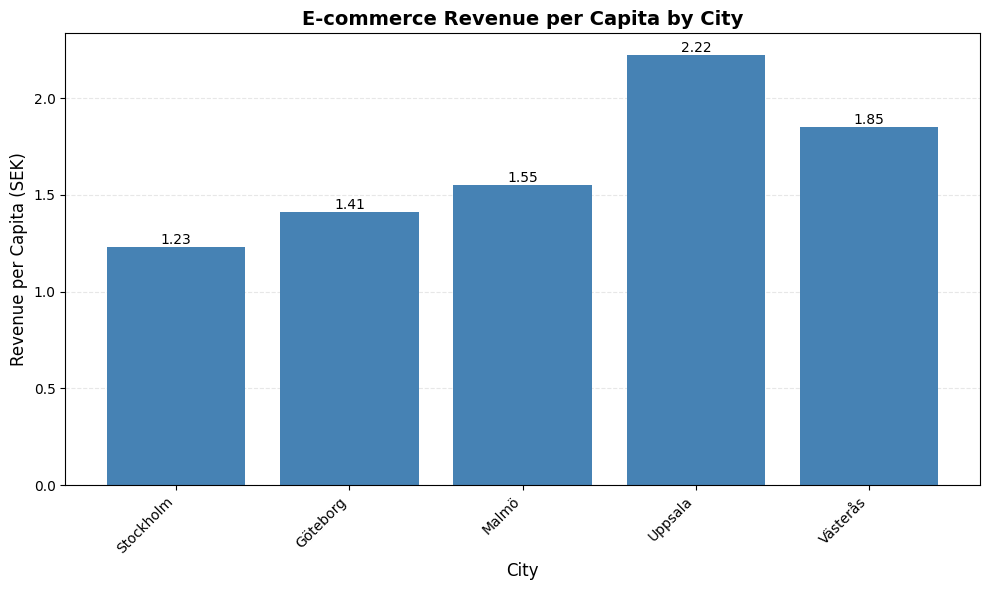

In [ ]:
perCapita = met.revenue_per_capita(df)

print(perCapita.to_string()))

vz.plot_revenue_per_capita(perCapita)